### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [291]:
data = pd.read_csv('data/coupons.csv')

In [292]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [293]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

### Step 1: Remove null values
I will drop the 'car' column as it contains data about the passenger's car. Since most of this data is missing, it will not be useful for analysis.

In [194]:
data = data.drop(columns=['car'])
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

I will also remove all rows that are missing data from the remaining columns above, in order to have a complete dataset.

In [195]:
data = data.dropna()
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Step 2: Rename Columns and Values
I will change the column name 'Y' to 'Accepted' and the values 1 to True and 0 to False for easier readability

In [297]:
data = data.rename(columns={'Y': "Accepted"})
data['Accepted'].replace([1,0], [True, False], inplace=True)
data[['Accepted']].sample(5)

,Accepted
5624,True
5782,False
28,False
85,False
715,False


### Step 3: Validate Output

In [302]:
print(data.shape)
data.sample(5)

(12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
6603,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,36,Married partner,...,NaN,less1,less1,never,1,1,1,0,1,True
7830,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,21,Single,...,4~8,1~3,less1,less1,1,1,0,0,1,False
7392,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,below21,Unmarried partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,True
8798,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,1,1,0,1,False
6596,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,36,Married partner,...,NaN,less1,less1,never,1,1,0,1,0,True


4. What proportion of the total observations chose to accept the coupon? 



From the data below, 56.84% of observations accepted the coupon.

In [309]:
data['Accepted'].value_counts(normalize=True)

True     0.568433
False    0.431567
Name: Accepted, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Count')

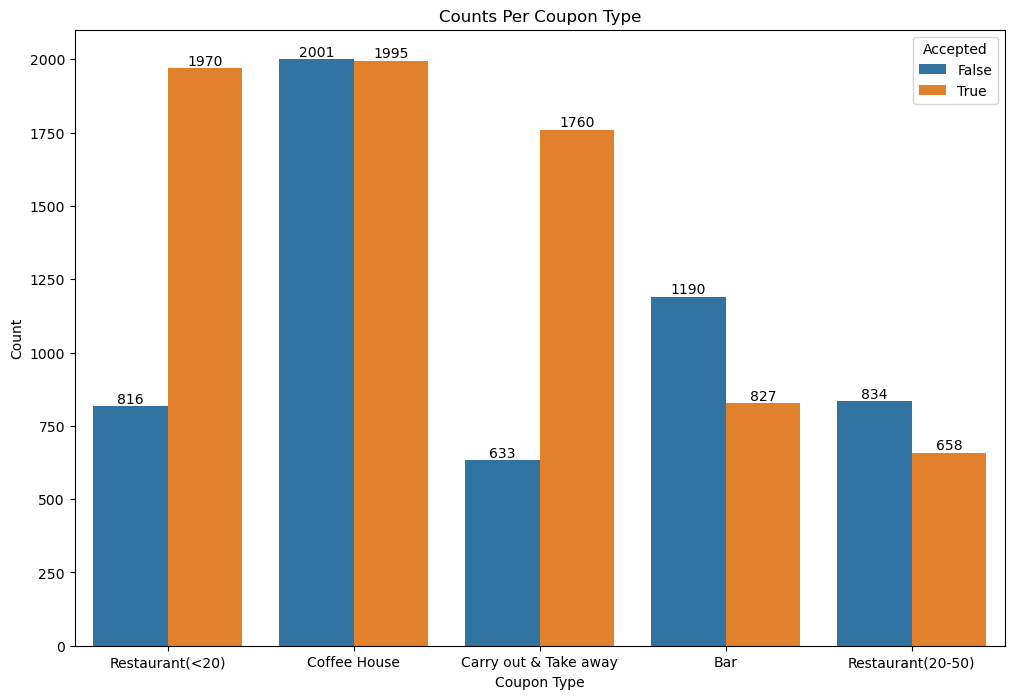

In [310]:
plt.figure(figsize=(12,8))

fig = sns.countplot(data, x='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Counts Per Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

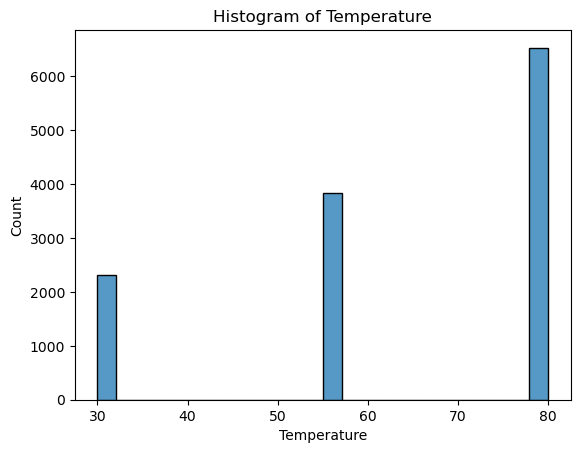

In [311]:
sns.histplot(data, x='temperature')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [312]:
df_bar = data.query('coupon == "Bar"')
print(df_bar.shape)
df_bar.sample(5)

(2017, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,True
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,True
11082,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,50plus,Divorced,...,4~8,4~8,gt8,4~8,1,1,0,0,1,True
11934,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,False
2703,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,4~8,less1,1,0,0,1,0,True


2. What proportion of bar coupons were accepted?


In [313]:
df_bar['Accepted'].value_counts(normalize=True)

False    0.589985
True     0.410015
Name: Accepted, dtype: float64

41% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Accepted     False  True   Sum  Acceptance Rate
bar_visits                                     
3 or fewer    1131   666  1797         0.370618
more than 3     59   161   220         0.731818


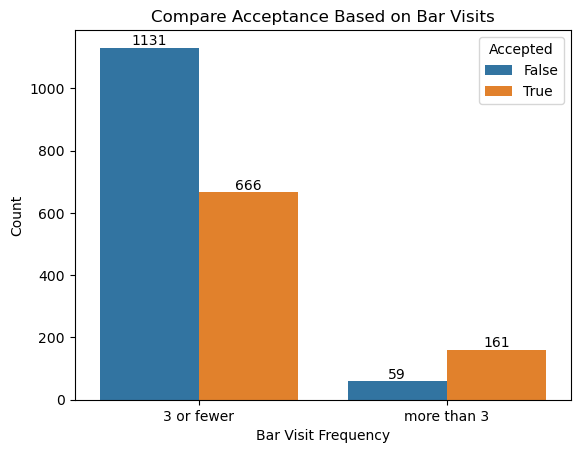

In [334]:
# Remove warning
pd.options.mode.chained_assignment = None

# Group Bar Visits
# df_bar['Bar'].value_counts()
def bar_visits(bar):
    if bar in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'
df_bar['bar_visits'] = df_bar['Bar'].apply(bar_visits)

# Create bar plot with Seaborn
fig = sns.countplot(df_bar, x='bar_visits', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Compare Acceptance Based on Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')

# # Create table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print(ct)

### Bar Visits Analysis

| bar_visits     | False     | True      | Sum     | Acceptance Rate |
|----------------|-----------|-----------|---------|-----------------|
| 3 or fewer     | 1131      | 666       | 1797    | 0.370618        |
| more than 3    | 59        | 161       | 220     | 0.731818        |

The acceptance rate of those that went to a bar three or less times per month is 37.06%
The acceptance rate of those that went to a bar more than three times per month is 73.18%

Clearly those that frequently go to the bar accepted the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
df_bar['age'].value_counts()

def condition2(bar_visits, age):
    # go to a bar more than once a month and are over the age of 25     
    if bar_visits not in ['never', 'less1'] and age not in ['below21', '21']:
        return 'bar_visits > 1 & age > 25'
    else:
        return 'other'

df_bar['condition2'] = df_bar[['Bar', 'age']].apply(lambda x: condition2(*x), axis=1)

ct = pd.crosstab(df_bar['condition2'], df_bar['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode="group")
fig.update_layout(title='>25 and Frequents Bars Acceptance Rates')

# Those that visit bars more than once a month and are over age of 25 made up ~21% of the observations.
# Of that pool, ~68% of those accepted the bar offers. In the "other" pool, only 33% accepted the offer. 

Y                                 0         1       sum  Acceptance Rate
condition2                                                              
bar_visits > 1 & age > 25  0.065342  0.145321  0.210664         0.689826
other                      0.522739  0.266597  0.789336         0.337748


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
df_bar['occupation'].value_counts()

def condition3(bar_visits, pax, occupation):
    # drivers who go to bars more than once a month 
    # had passengers that were not a kid 
    # had occupations other than farming, fishing, or forestry
    if bar_visits not in ['never', 'less1'] and pax not in ['Kid(s)'] and occupation not in ['Farming Fishing & Forestry']:
        return 'bar visits > 1 & pax not kids & jobs not FFF'
    else: 
        return 'other'
    

df_bar['condition3'] = df_bar[['Bar', 'passanger', 'occupation']].apply(lambda x: condition3(*x), axis=1)

ct = pd.crosstab(df_bar['condition3'], df_bar['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode="group")
fig.update_layout(title='Condition 3 Acceptance Rates')

# ~27% of the observations meet the condition above. Of that, 70% accepted the offer. 

Y                                                    0         1       sum  \
condition3                                                                   
bar visits > 1 & pax not kids & jobs not FFF  0.080502  0.196550  0.277052   
other                                         0.507580  0.215369  0.722948   

Y                                             Acceptance Rate  
condition3                                                     
bar visits > 1 & pax not kids & jobs not FFF         0.709434  
other                                                0.297903  


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [55]:
def condition4(Bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    # go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
    # go to bars more than once a month and are under the age of 30 OR
    # go to cheap restaurants more than 4 times a month and income is less than 50K.
    return (bar_visits not in ['never', 'less1'] and passanger not in ['Kid(s)'] and maritalStatus not in ['widowed']) or (bar_visits not in ['never', 'less1'] and age in ['below21', '21', '26']) or (RestaurantLessThan20 in ['4~8', 'gt8'] and income in ['Less than $12500', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499'])

df_bar['condition4'] = df_bar[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']].apply(lambda x: condition4(*x), axis=1)

ct = pd.crosstab(df_bar['condition4'], df_bar['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode="group")
fig.update_layout(title='Condition 4 Acceptance Rates')
# df_bar.info()
# df_bar['income'].value_counts()

# ~92% of the observations meet the criteria of condition4 where ~43% of those observations accepted the offer.
# Of the remaining 7.5%, only 17% of those accepted the offer.

Y                  0         1       sum  Acceptance Rate
condition4                                               
False       0.061160  0.013068  0.074229         0.176056
True        0.526921  0.398850  0.925771         0.430830


In [63]:
def condition5(Bar, passanger, maritalStatus, age, RestaurantLessThan20, income, occupation):
    return (Bar in ['1~3']) or (bar_visits not in ['never', 'less1'] and age not in ['below21', '21']) or (bar_visits not in ['never', 'less1'] and passanger not in ['Kid(s)'] and occupation not in ['Farming Fishing & Forestry'])

df_bar['condition5'] = df_bar[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income', 'occupation']].apply(lambda x: condition5(*x), axis=1)

ct = pd.crosstab(df_bar['condition5'], df_bar['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode="group")
fig.update_layout(title='Condition 5 Acceptance Rates')
# df_bar.info()
# df_bar['income'].value_counts()



Y                  0         1       sum  Acceptance Rate
condition5                                               
False       0.005227  0.001045  0.006273         0.166667
True        0.582854  0.410873  0.993727         0.413467


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Conclusion reviewing Bar Coupons

### Reviewing Bar Visits

| bar_visits     | 0 (%)         | 1 (%)        | sum       | Acceptance Rate |
|----------------|-----------|-----------|-----------|-----------------|
| 3 or fewer     | 0.564036  | 0.335076  | 0.899111  | 0.372674        |
| more than 3    | 0.024046  | 0.076843  | 0.100889  | 0.761658        |

For the bar coupon, the target audience should be those that visit a bar more than 3 times a month. 76% of coupons sent to those customers were accepted


### Reviewing Bar Visits and Age

| condition2                  | 0 (%)        | 1 (%)        | sum       | Acceptance Rate |
|-----------------------------|-----------|-----------|-----------|-----------------|
| bar_visits > 1 & age > 25   | 0.065342  | 0.145321  | 0.210664  | 0.689826        |
| other                       | 0.522739  | 0.266597  | 0.789336  | 0.337748        |

Adding another feature into the mix, age, 68% of those 25 and older that visit the bar more than once a month accepted the coupon. 

### Reviewing Bar Visits, Passangers, Occupation

| condition3                                        | 0 (%)        | 1 (%)         | sum       | Acceptance Rate |
|---------------------------------------------------|-----------|-----------|-----------|-----------------|
| bar visits > 1 & pax not kids & jobs not FFF      | 0.080502  | 0.196550  | 0.277052  | 0.709434        |
| other                                             | 0.507580  | 0.215369  | 0.722948  | 0.297903        |

Digging furthur into this pool, those that visit bars more than once a monh, no kids, and are not in AGG type of jobs accepted 70% of the coupons. 

### Reviewing Condition 4

| condition4  | 0 (%)        | 1 (%)        | sum       | Acceptance Rate |
|-------------|-----------|-----------|-----------|-----------------|
| False       | 0.061160  | 0.013068  | 0.074229  | 0.176056        |
| True        | 0.526921  | 0.398850  | 0.925771  | 0.430830        |


The target audience for the Bar coupons should be passengers that visit bars more than 3 times a month, passengers that are 25+ and visit bars at least once a month, and passengers that visit bars at least once a month, do not have kids and are not in an AGG type of job. Targeting these groups should yield a higher acceptance rate for the Bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Overview of All Coupon Acceptance Rates

In [68]:
ct = pd.crosstab(data['coupon'], data['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode="group")
fig.update_layout(title='Coupon Type Acceptance')

Y                             0         1       sum  Acceptance Rate
coupon                                                              
Bar                    0.093137  0.065237  0.158374         0.411918
Restaurant(20-50)      0.064989  0.052322  0.117311         0.446013
Coffee House           0.159119  0.156801  0.315920         0.496331
Restaurant(<20)        0.063913  0.155725  0.219637         0.709009
Carry out & Take away  0.049507  0.139250  0.188757         0.737719


From the data above, the coupon with the largest acceptance rate was the "Carry out & Take away" coupon with 73% acceptance rate. The Bar coupon was the lowest with 41% acceptance rate. Lets look into the Restaurant(20-50) coupon with a 44% acceptance rate to see if we can indentify the target audience.

### Reviewing Restaurant(20-50) Coupon (44% Acceptance Rate)

In [74]:
df_res_20_50 = data.query('coupon == "Restaurant(20-50)"')
df_res_20_50.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1713,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,0
10463,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,36,Divorced,...,gt8,4~8,4~8,less1,1,1,0,0,1,1
5692,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,21,Single,...,1~3,gt8,4~8,never,1,1,0,0,1,0
5067,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Male,36,Married partner,...,gt8,4~8,less1,less1,1,0,0,0,1,1
3193,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Female,26,Married partner,...,never,1~3,less1,less1,1,0,0,0,1,1
6330,Home,Alone,Sunny,55,6PM,Restaurant(20-50),2h,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,1,0,0,1,0
12431,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,less1,4~8,1~3,4~8,1,0,0,1,0,1
4617,Home,Alone,Sunny,55,6PM,Restaurant(20-50),2h,Male,21,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,1
6468,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,less1,1~3,less1,less1,1,1,0,0,1,0
2087,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,1,0,0,1,0


### Reviewing Age within Restaurant(20-50) Coupon

In [98]:
ct = pd.crosstab(df_res_20_50['age'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance By Age')
fig.show()

Y               0         1       sum  Acceptance Rate
age                                                   
50plus   0.098095  0.053634  0.151729         0.353488
31       0.092449  0.067043  0.159492         0.420354
21       0.114326  0.086097  0.200423         0.429577
41       0.050812  0.040932  0.091743         0.446154
below21  0.022583  0.018349  0.040932         0.448276
36       0.055752  0.053634  0.109386         0.490323
46       0.027523  0.028229  0.055752         0.506329
26       0.092449  0.098095  0.190543         0.514815


The above plot shows the age groups with the largest acceptance rate of the Resturant(20-50) coupon. 
Below lets group ages with an acceptance rate larger than 44%.

In [100]:
def groupAge(age):
    return age in ['36', '46', '26']

df_res_20_50['HighAcceptanceAgeGroup'] = df_res_20_50[['age']].apply(lambda x: groupAge(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceAgeGroup'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Age Group')
fig.show()

Y                              0         1       sum  Acceptance Rate
HighAcceptanceAgeGroup                                               
False                   0.378264  0.266055  0.644319         0.412924
True                    0.175723  0.179958  0.355681         0.505952


From the observations, passengers between 26 and 46 years of age accepted the coupon at a 50.5% acceptance rate, 6.5% higher than the total acceptance rate of the coupon.

### Reviewing MaritalStatus within Restaurant(20-50) Coupon

In [117]:
# df_res_20_50.info()
df_res_20_50['maritalStatus'].value_counts()

ct = pd.crosstab(df_res_20_50['maritalStatus'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance By maritalStatus')
fig.show()

Y                         0         1       sum  Acceptance Rate
maritalStatus                                                   
Widowed            0.007763  0.002117  0.009880         0.214286
Divorced           0.028229  0.015526  0.043754         0.354839
Married partner    0.234298  0.173606  0.407904         0.425606
Unmarried partner  0.079040  0.070572  0.149612         0.471698
Single             0.204658  0.184192  0.388850         0.473684


In [176]:
df_res_20_50.query('maritalStatus == "Married partner"').groupby('Y')[['occupation']].value_counts()

Y  occupation                               
0  Unemployed                                   66
   Computer & Mathematical                      49
   Education&Training&Library                   33
   Management                                   24
   Business & Financial                         24
   Sales & Related                              21
   Arts Design Entertainment Sports & Media     20
   Retired                                      16
   Student                                      15
   Healthcare Practitioners & Technical         12
   Personal Care & Service                       7
   Construction & Extraction                     6
   Transportation & Material Moving              5
   Community & Social Services                   5
   Farming Fishing & Forestry                    5
   Architecture & Engineering                    5
   Office & Administrative Support               5
   Life Physical Social Science                  4
   Protective Service                

The above plot shows the marital status groups with the largest acceptance rate of the Resturant(20-50) coupon. 
Below lets group the statuses with an acceptance rate larger than 44%.

In [171]:
def groupMaritalStatus(maritalStatus):
    return maritalStatus in ['Unmarried partner','Single']

df_res_20_50['HighAcceptanceMaritalStatusGroup'] = df_res_20_50[['maritalStatus']].apply(lambda x: groupMaritalStatus(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceMaritalStatusGroup'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific maritalStatus Group')
fig.show()

Y                                        0         1       sum  \
HighAcceptanceMaritalStatusGroup                                 
False                             0.270289  0.191249  0.461538   
True                              0.283698  0.254764  0.538462   

Y                                 Acceptance Rate  
HighAcceptanceMaritalStatusGroup                   
False                                    0.414373  
True                                     0.473132  


From the observations, passengers that are single or have an unmarried partner accepted the coupon at a 47.3% acceptance rate, 3.3% higher than the total acceptance rate of the coupon.

### Reviewing Income within Restaurant(20-50) Coupon

In [115]:
# df_res_20_50.info()
df_res_20_50['income'].value_counts()

ct = pd.crosstab(df_res_20_50['income'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance By income')
fig.update_xaxes(tickangle=90)
fig.show()

Y                        0         1       sum  Acceptance Rate
income                                                         
Less than $12500  0.055752  0.030346  0.086097         0.352459
$62500 - $74999   0.043049  0.024700  0.067749         0.364583
$12500 - $24999   0.084686  0.051517  0.136203         0.378238
$87500 - $99999   0.043049  0.027523  0.070572         0.390000
$37500 - $49999   0.076923  0.061397  0.138320         0.443878
$75000 - $87499   0.038814  0.033169  0.071983         0.460784
$50000 - $62499   0.069866  0.067043  0.136909         0.489691
$100000 or More   0.070572  0.071277  0.141849         0.502488
$25000 - $37499   0.071277  0.079040  0.150318         0.525822


The above plot shows the income groups with the largest acceptance rate of the Resturant(20-50) coupon. 

In [162]:
def groupIncome(income):
    return income in ['$25000 - $37499']

df_res_20_50['HighAcceptanceIncomeGroup'] = df_res_20_50[['income']].apply(lambda x: groupIncome(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceIncomeGroup'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Income Groups')
fig.show()

Y                                 0         1       sum  Acceptance Rate
HighAcceptanceIncomeGroup                                               
False                      0.482710  0.366972  0.849682         0.431894
True                       0.071277  0.079040  0.150318         0.525822


From the observations, passengers that are have incomes in the ranges below accepted the coupon at a 50% acceptance rate, 6% higher than the total acceptance rate of the coupon.

'$75000 - $87499', '$50000 - $62499', '$100000 or More', '$25000 - $37499'

### Reviewing Restaurant Visits within Restaurant(20-50) Coupon

In [124]:
# df_res_20_50.info()
df_res_20_50['Restaurant20To50'].value_counts()

ct = pd.crosstab(df_res_20_50['Restaurant20To50'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct.sort_values(by='Acceptance Rate'))
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance By Restaurant20To50')
fig.update_xaxes(tickangle=90)
fig.show()

Y                        0         1       sum  Acceptance Rate
Restaurant20To50                                               
never             0.109386  0.046577  0.155963         0.298643
less1             0.292167  0.208186  0.500353         0.416079
1~3               0.123500  0.138320  0.261821         0.528302
4~8               0.021877  0.037403  0.059280         0.630952
gt8               0.007057  0.015526  0.022583         0.687500


The above plot shows the restaurant visitation groups with the largest acceptance rate of the Resturant(20-50) coupon. Below lets group the restaurant visitation groups with an acceptance rate larger than 44%.

In [128]:
def groupVisits(Restaurant20To50):
    return Restaurant20To50 in ['4~8', 'gt8']

df_res_20_50['HighAcceptanceRestaurant20To50Group'] = df_res_20_50[['Restaurant20To50']].apply(lambda x: groupVisits(*x), axis=1)

ct = pd.crosstab(df_res_20_50['HighAcceptanceRestaurant20To50Group'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Restaurant20To50 Groups')
fig.show()

Y                                           0         1       sum  \
HighAcceptanceRestaurant20To50Group                                 
False                                0.525053  0.393084  0.918137   
True                                 0.028934  0.052929  0.081863   

Y                                    Acceptance Rate  
HighAcceptanceRestaurant20To50Group                   
False                                       0.428132  
True                                        0.646552  


Targeting passengars that visit these restuarants more than 4 times a month yeilds a 64% acceptance rate, 20% higher than the overall acceptance rate of the coupon.

### Reviewing Enroute Data within Restaurant(20-50) Coupon

In [146]:
# df_res_20_50.info()

ct5 = pd.crosstab(df_res_20_50['toCoupon_GEQ5min'], df_res_20_50['Y'])
ct5['sum'] = ct5[0] + ct5[1]
ct5['Acceptance Rate'] = ct5[1] / ct5['sum']

ct15 = pd.crosstab(df_res_20_50['toCoupon_GEQ15min'], df_res_20_50['Y'])
ct15['sum'] = ct15[0] + ct15[1]
ct15['Acceptance Rate'] = ct15[1] / ct15['sum']

ct25 = pd.crosstab(df_res_20_50['toCoupon_GEQ25min'], df_res_20_50['Y'])
ct25['sum'] = ct25[0] + ct25[1]
ct25['Acceptance Rate'] = ct25[1] / ct25['sum']

ctSame = pd.crosstab(df_res_20_50['direction_same'], df_res_20_50['Y'])
ctSame['sum'] = ctSame[0] + ctSame[1]
ctSame['Acceptance Rate'] = ctSame[1] / ctSame['sum']

ctOpp = pd.crosstab(df_res_20_50['direction_opp'], df_res_20_50['Y'])
ctOpp['sum'] = ctOpp[0] + ctOpp[1]
ctOpp['Acceptance Rate'] = ctOpp[1] / ctOpp['sum']

print(ct5)
print(ct15)
print(ct25)
print(ctSame)
print(ctOpp)

Y                   0    1   sum  Acceptance Rate
toCoupon_GEQ5min                                 
1                 785  632  1417         0.446013
Y                    0    1  sum  Acceptance Rate
toCoupon_GEQ15min                                
0                  282  238  520         0.457692
1                  503  394  897         0.439242
Y                    0    1   sum  Acceptance Rate
toCoupon_GEQ25min                                 
0                  722  584  1306         0.447167
1                   63   48   111         0.432432
Y                 0    1   sum  Acceptance Rate
direction_same                                 
0               658  518  1176         0.440476
1               127  114   241         0.473029
Y                0    1   sum  Acceptance Rate
direction_opp                                 
0              127  114   241         0.473029
1              658  518  1176         0.440476


### Grouping and Identifying a Target Audience

In [167]:
def Target(Restaurant20To50, age, income, maritalStatus):
    # Target passengers that visit more than 4 times a month and are between 26 and 46 years of age
    if (age in ['36', '46', '26'] and Restaurant20To50 in ['4~8', 'gt8']):
        return 'TargetGroup1'
    
    # Target passengers that are single and make between 25k and 37.5k
    if (income in ['$25000 - $37499'] and maritalStatus in ['Single']):
        return 'TargetGroup2'
    
    return 'other'

df_res_20_50['TargetGroup'] = df_res_20_50[['Restaurant20To50', 'age', 'income', 'maritalStatus']].apply(lambda x: Target(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Y'], normalize=True)
ct['sum'] = ct[0] + ct[1]
ct['Acceptance Rate'] = ct[1] / ct['sum']
print(ct)
fig = px.bar(ct[[0,1]], barmode='group')
fig.update_layout(title='Coupon Type Acceptance by Specific Target Groups')
fig.show()

Y                    0         1       sum  Acceptance Rate
TargetGroup                                                
TargetGroup1  0.006351  0.024700  0.031052         0.795455
TargetGroup2  0.028229  0.039520  0.067749         0.583333
other         0.519407  0.381793  0.901200         0.423649


In [153]:
df_res_20_50.query('TargetGroup != "TargetVisits&Age"')[['income']].value_counts(normalize=True)

income          
$25000 - $37499     0.152950
$100000 or More     0.142753
$50000 - $62499     0.139111
$12500 - $24999     0.134741
$37500 - $49999     0.130371
Less than $12500    0.083030
$75000 - $87499     0.074290
$87500 - $99999     0.072833
$62500 - $74999     0.069920
dtype: float64